# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Adding date for when this is all collected:
date_accessed = time.strftime('%Y-%m-%d')
# time.strftime syntax from https://www.oreilly.com/library/view/python-standard-library/0596000960/ch01s15.html

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chui
Processing Record 2 of Set 1 | idri
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | smithers
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | agaete
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | obo
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | coos bay
Processing Record 14 of Set 1 | cascais
Processing Record 15 of Set 1 | po
City not found. Skipping...
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | banda aceh
P

Processing Record 40 of Set 4 | guerrero negro
Processing Record 41 of Set 4 | ust-nera
Processing Record 42 of Set 4 | san andres
Processing Record 43 of Set 4 | sesheke
Processing Record 44 of Set 4 | ayr
Processing Record 45 of Set 4 | aasiaat
Processing Record 46 of Set 4 | constantia
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | al bawiti
Processing Record 49 of Set 4 | kerema
Processing Record 0 of Set 5 | thompson
Processing Record 1 of Set 5 | mineiros
Processing Record 2 of Set 5 | poquoson
Processing Record 3 of Set 5 | quillacollo
Processing Record 4 of Set 5 | kone
Processing Record 5 of Set 5 | cox's bazar
Processing Record 6 of Set 5 | pathein
Processing Record 7 of Set 5 | prince rupert
Processing Record 8 of Set 5 | karlshamn
Processing Record 9 of Set 5 | uturoa
Processing Record 10 of Set 5 | cabo san lucas
Processing Record 11 of Set 5 | tobruk
Processing Record 12 of Set 5 | bredasdorp
Processing Record 13 of Set 5 | mil'kovo
Processin

Processing Record 31 of Set 8 | nar'yan-mar
Processing Record 32 of Set 8 | neelankarai
Processing Record 33 of Set 8 | fauske
Processing Record 34 of Set 8 | thunder bay
Processing Record 35 of Set 8 | saipan
Processing Record 36 of Set 8 | huarmey
Processing Record 37 of Set 8 | dyatlovo
Processing Record 38 of Set 8 | gwanda
Processing Record 39 of Set 8 | vadso
Processing Record 40 of Set 8 | iquique
Processing Record 41 of Set 8 | crane
Processing Record 42 of Set 8 | markaz-e hukumat-e darweshan
Processing Record 43 of Set 8 | kribi
Processing Record 44 of Set 8 | yangor
City not found. Skipping...
Processing Record 45 of Set 8 | cruz alta
Processing Record 46 of Set 8 | dakhla
Processing Record 47 of Set 8 | registro
Processing Record 48 of Set 8 | deqen
Processing Record 49 of Set 8 | akwatia
Processing Record 0 of Set 9 | tome acu
Processing Record 1 of Set 9 | chunskiy
Processing Record 2 of Set 9 | monte argentario
Processing Record 3 of Set 9 | mikun'
Processing Record 4 of

Processing Record 20 of Set 12 | tefe
Processing Record 21 of Set 12 | kwolla
Processing Record 22 of Set 12 | dezhou
Processing Record 23 of Set 12 | goundam
Processing Record 24 of Set 12 | la passe
Processing Record 25 of Set 12 | yima
Processing Record 26 of Set 12 | thinadhoo
Processing Record 27 of Set 12 | ha tinh
Processing Record 28 of Set 12 | timimoun
Processing Record 29 of Set 12 | ribas do rio pardo
Processing Record 30 of Set 12 | alotau
City not found. Skipping...
Processing Record 31 of Set 12 | siverskiy
Processing Record 32 of Set 12 | yilan
Processing Record 33 of Set 12 | mbamba bay
Processing Record 34 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 35 of Set 12 | el alto
Processing Record 36 of Set 12 | benghazi
Processing Record 37 of Set 12 | noshiro
Processing Record 38 of Set 12 | machico
Processing Record 39 of Set 12 | hasaki
Processing Record 40 of Set 12 | codrington
Processing Record 41 of Set 12 | pionerskiy
Processing Record 42 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chui,-33.6971,-53.4616,23.35,62,7,5.36,UY,1702313421
1,idri,27.5000,13.2667,16.64,35,0,3.77,LY,1702313421
2,new norfolk,-42.7826,147.0587,10.95,98,85,0.93,AU,1702313421
3,smithers,54.7804,-127.1743,-3.82,93,100,1.54,CA,1702313421
4,iqaluit,63.7506,-68.5145,-17.15,78,75,9.77,CA,1702313422


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chui,-33.6971,-53.4616,23.35,62,7,5.36,UY,1702313421
1,idri,27.5000,13.2667,16.64,35,0,3.77,LY,1702313421
2,new norfolk,-42.7826,147.0587,10.95,98,85,0.93,AU,1702313421
3,smithers,54.7804,-127.1743,-3.82,93,100,1.54,CA,1702313421
4,iqaluit,63.7506,-68.5145,-17.15,78,75,9.77,CA,1702313422


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

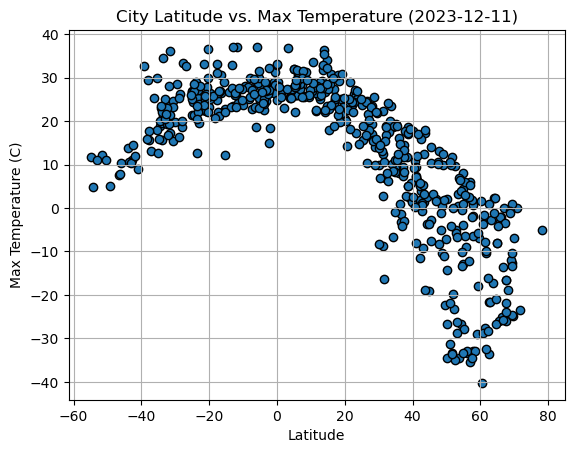

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({date_accessed})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

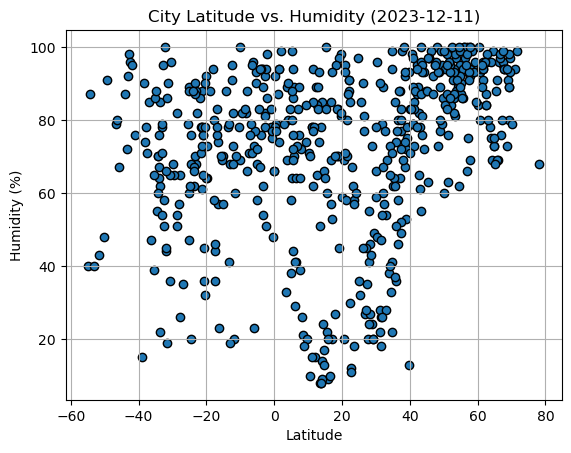

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.title(f"City Latitude vs. Humidity ({date_accessed})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

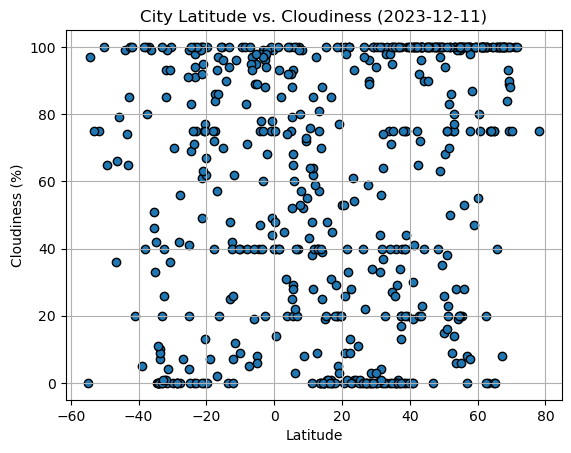

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({date_accessed})")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

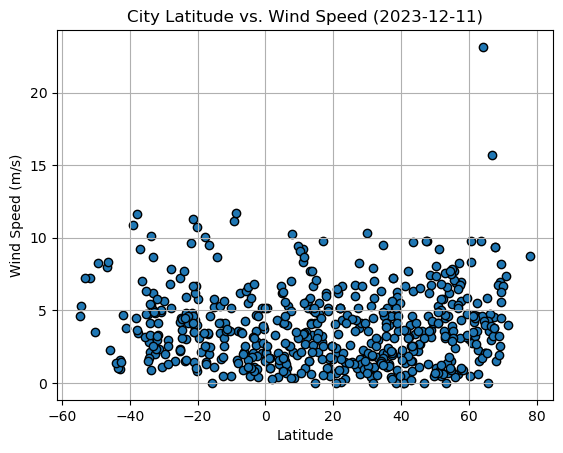

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({date_accessed})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
# Everything within the function comes from module 6, day 2, 07-Stu_Weather_Stats activity weather_stats.ipynb

def plot_regression(df, ycolumn, x, y):
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df["Lat"], df[ycolumn])
    
    # Get regression values
    regress_values = df["Lat"] * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Plot
    plt.scatter(df["Lat"], df[ycolumn])
    plt.plot(df["Lat"],regress_values,"r-")
    
    # Label plot and annotate the line equation
    plt.xlabel("Latitude")
    plt.ylabel(ycolumn)
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    
    # Print rsquared value
    print(f"The r-value is: {rvalue}")

    # Show plot
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >= 0, :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,idri,27.5000,13.2667,16.64,35,0,3.77,LY,1702313421
3,smithers,54.7804,-127.1743,-3.82,93,100,1.54,CA,1702313421
4,iqaluit,63.7506,-68.5145,-17.15,78,75,9.77,CA,1702313422
6,longyearbyen,78.2186,15.6401,-5.09,68,75,8.75,SJ,1702313422
7,agaete,28.1002,-15.7000,23.56,55,96,1.27,ES,1702313422


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] < 0, :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chui,-33.6971,-53.4616,23.35,62,7,5.36,UY,1702313421
2,new norfolk,-42.7826,147.0587,10.95,98,85,0.93,AU,1702313421
5,kavieng,-2.5744,150.7967,27.51,82,97,2.82,PG,1702313422
10,edinburgh of the seven seas,-37.0676,-12.3116,13.10,85,100,9.24,SH,1702313423
14,papatowai,-46.5619,169.4708,7.69,79,36,7.98,NZ,1702313424


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8371532200306793


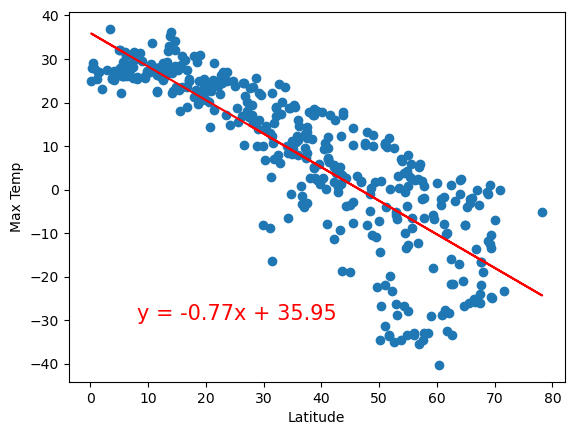

In [59]:
# Linear regression on Northern Hemisphere
plot_regression(northern_hemi_df, "Max Temp", 8, -30)

The r-value is: 0.614775762527302


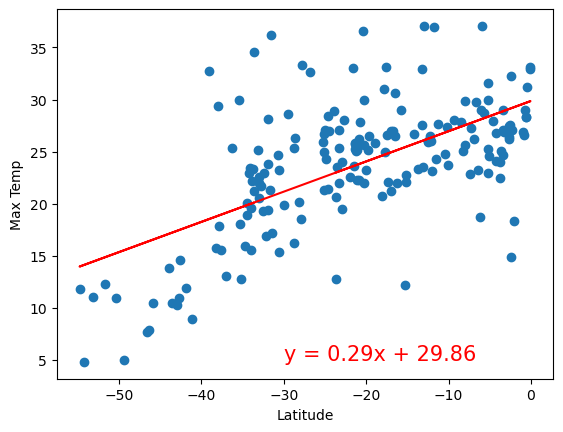

In [60]:
# Linear regression on Southern Hemisphere
plot_regression(southern_hemi_df, "Max Temp", -30, 5)

**Discussion about the linear relationship:** The relationship in the Northern Hemisphere is strong (> 0.75), while the relationship in the Southern Hemisphere is moderate (0.5 to 0.75).  This makes sense from a geographic perspective - there is much more landmass in the Northern Hemisphere, so cities in the North are more likely to be located further from oceans and seas that can regulate their temperatures.  Northern cities will, as such, be more likely to have their temperature affected by latitude.  In the Southern Hemisphere, most cities are closer to large bodies of water, and thus have their temperatures regulated by ocean currents.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4347647372690278


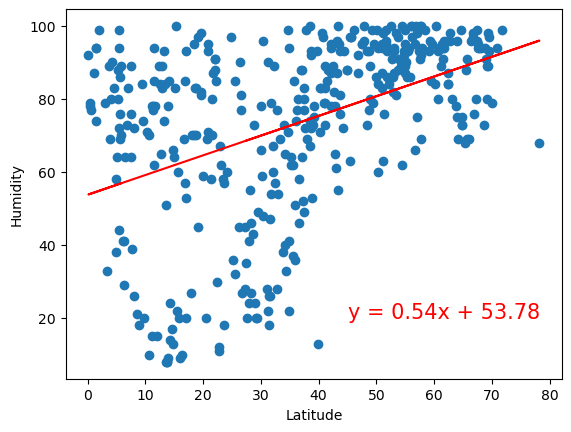

In [63]:
# Northern Hemisphere
plot_regression(northern_hemi_df, "Humidity", 45, 20)

The r-value is: 0.15005124397236508


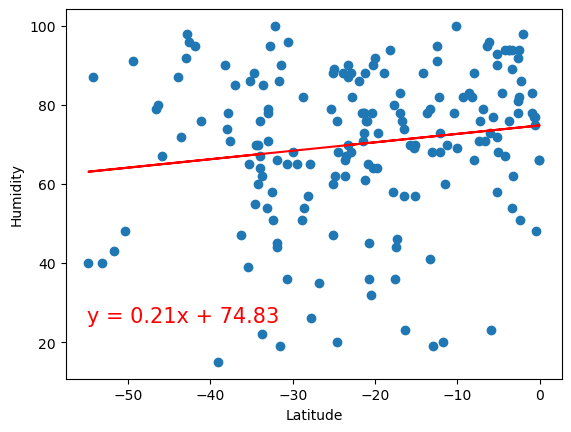

In [67]:
# Southern Hemisphere
plot_regression(southern_hemi_df, "Humidity", -55, 25)

**Discussion about the linear relationship:** The Northern Hemisphere r-value is weakly-related (0.25 to 0.5).  The Southern Hemisphere, on the other hand, is below 0.25.  Once again, the amount of land north or south of the equator plays a role.  Along the Tropic of Capricorn and the Tropic of Cancer, almost everything is a desert, with relatively low humidity.  As you get further away from those lines north and south, humidity increases.  This is especially obvious in the scatter plot of the Northern Hemisphere, where north of 40 degress latitude, everything has a humidity > 50%.  If we isolated the chart to just latitudes > 40, however, the association is even weaker (0.085).  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.32132074746401357


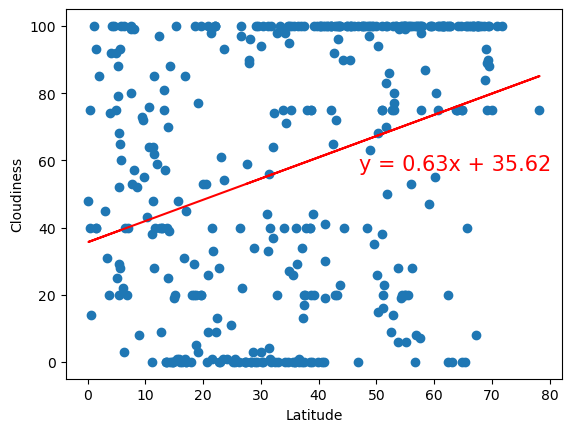

In [74]:
# Northern Hemisphere
plot_regression(northern_hemi_df, "Cloudiness", 47, 57)

The r-value is: 0.17490007614076072


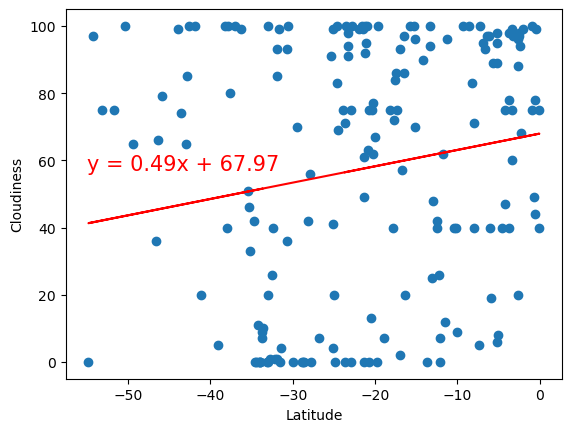

In [76]:
# Southern Hemisphere
plot_regression(southern_hemi_df, "Cloudiness", -55, 57)

**Discussion about the linear relationship:** The text from the humidity section could be basically copied and pasted here.  Weak relationship in the North, no relationship in the South, possibly for the same reasons that humidity follows the same pattern.  Where the air is dry, clouds are less likely.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17675555891969646


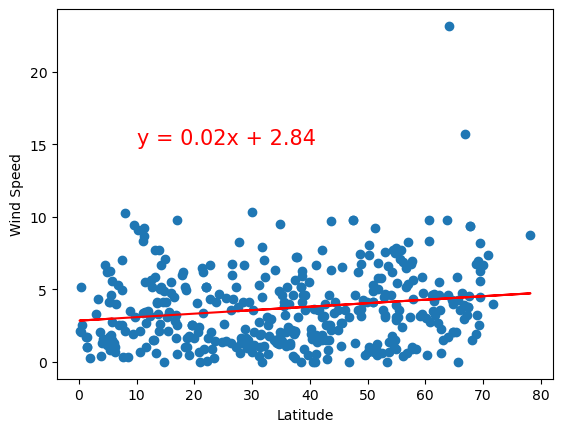

In [78]:
# Northern Hemisphere
plot_regression(northern_hemi_df, "Wind Speed", 10, 15)

The r-value is: -0.20675114166739045


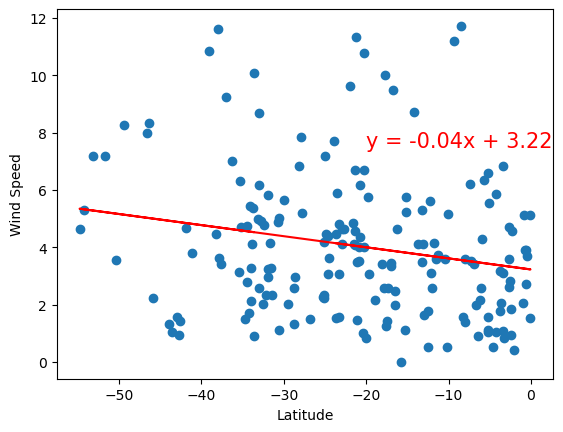

In [80]:
# Southern Hemisphere
plot_regression(southern_hemi_df, "Wind Speed", -20, 7.5)

**Discussion about the linear relationship:** No observed response from either dataset.  Which makes sense - wind is more a function of jet stream and global convection than latitude.